In [31]:
from PYTHON import generate_simulated_data as gsd
import matplotlib.pyplot as plt
import pystan
import pickle
import numpy as np
%matplotlib inline

In [45]:
data_dict = gsd.generate_simulated_data()

model_name = 'HBMNL_1.1'

with open('./MODELS/{0}.stan'.format(model_name), 'r') as f:
    stan_model = f.read()

try:
    sm = pickle.load(open('./MODELS/{0}.pkl'.format(model_name), 'rb'))

except:
    sm = pystan.StanModel(model_code=stan_model)
    with open('./MODELS/{0}.pkl'.format(model_name), 'wb') as f:
        pickle.dump(sm, f)

fit = sm.sampling(data=data_dict, iter=800, chains=2)
B = fit.extract(pars=['B'])['B'][700:].mean(axis=0)


Y_pred = fit.extract(['Yp'])['Yp']


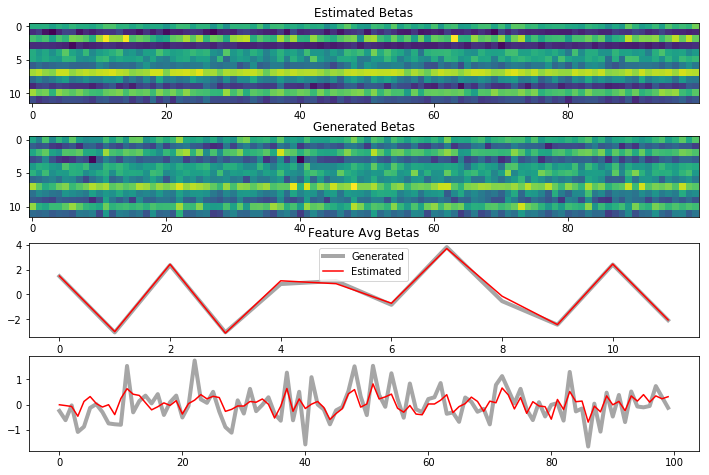

In [46]:


# Plot the betas both generated and estimated
plt.figure(figsize=(12,8))

plt.subplot(411)
plt.imshow(B.T)
plt.title("Estimated Betas")

plt.subplot(412)
plt.imshow(data_dict['Beta'])
plt.title("Generated Betas")

plt.subplot(413)
plt.plot(np.arange(12), data_dict['Beta'].mean(axis=1), color='grey', lw=4, alpha=.7, label='Generated')
plt.plot(np.arange(12), B.T.mean(axis=1), color='r', label='Estimated')
plt.legend()
plt.title("Feature Avg Betas")

plt.subplot(414)
y = B.T.mean(axis=0)
plt.plot(np.arange(len(y)), data_dict['Beta'].mean(axis=0), color='grey', alpha=.7, lw=4)
plt.plot(np.arange(len(y)), y, color='r')

plt.show()

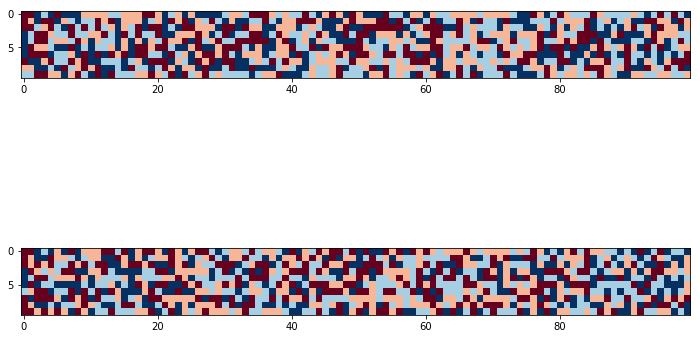

In [47]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.imshow(data_dict['Y'].T, cmap='RdBu')
plt.subplot(212)
plt.imshow(Y_pred[-1].T, cmap='RdBu')
plt.show()

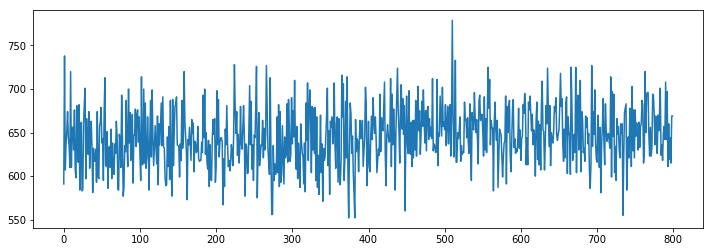

In [48]:
plt.figure(figsize=(12,4))
L = [np.absolute(data_dict['Y']-Y_pred[i]).sum() for i in range(Y_pred.shape[0])]
plt.plot(L)
plt.show()

# Prediction Accuracy


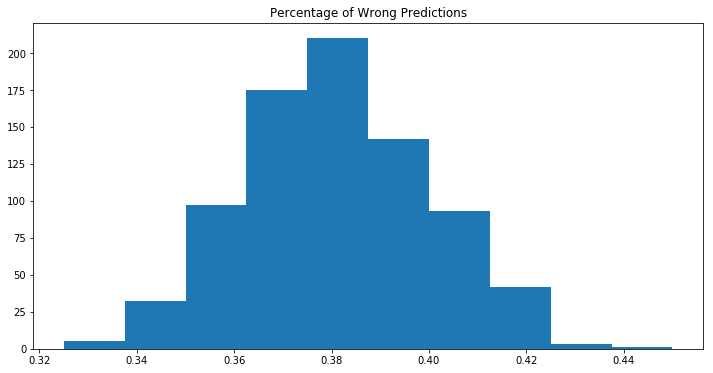

In [49]:
A = []
for i in range(Y_pred.shape[0]):
    A.append(np.count_nonzero(np.absolute(data_dict['Y'].flatten()-Y_pred[i].flatten()))/len(Y_pred[-1].flatten()))
plt.figure(figsize=(12,6))
plt.hist(A)
plt.title("Percentage of Wrong Predictions")
plt.show()